# Basics of deep learning - Neural Network with NumPy
## Binary-Classification
By Etai Zilberman, Bar Ara


## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

## Import Libraries

In [ ]:
import time
start = time.time()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Download Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 475 µs (started: 2025-01-29 09:41:17 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. It includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. It includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 75.1 ms (started: 2025-01-29 09:41:17 +00:00)


## Data preprocessing

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X = X / 255
print(X.shape)

(5000, 784)
time: 20.9 ms (started: 2025-01-29 09:41:17 +00:00)


### Selecting two classes

In [ ]:
classes=["7","8"]

time: 338 µs (started: 2025-01-29 09:41:17 +00:00)


In [ ]:
class1 = np.array([X[i] for i in range(examples) if y[i] == classes[0]])
class2 = np.array([X[i] for i in range(examples) if y[i] == classes[1]])

time: 14.8 ms (started: 2025-01-29 09:41:17 +00:00)


In [ ]:
class1.shape, class2.shape

((500, 784), (500, 784))

time: 5.32 ms (started: 2025-01-29 09:41:17 +00:00)


### Spliting the data into Train set and Test set

In [ ]:
from sklearn.utils import shuffle

split_class1 = int(0.8 * class1.shape[0])
split_class2 = int(0.8 * class2.shape[0])

X_train_class1, X_test_class1 = class1[:split_class1], class1[split_class1:]
X_train_class2, X_test_class2 = class2[:split_class2], class2[split_class2:]

X_train = np.concatenate((X_train_class1, X_train_class2), axis=0)
X_test = np.concatenate((X_test_class1, X_test_class2), axis=0)

Y_train_class1 = np.zeros((X_train_class1.shape[0], 1),np.int32)
Y_train_class2 = np.ones((X_train_class2.shape[0], 1),np.int32)
Y_test_class1 = np.zeros((X_test_class1.shape[0], 1),np.int32)
Y_test_class2 = np.ones((X_test_class2.shape[0], 1),np.int32)

Y_train = np.concatenate((Y_train_class1, Y_train_class2), axis=0)
Y_test = np.concatenate((Y_test_class1, Y_test_class2), axis=0)

X_train, Y_train = shuffle(X_train, Y_train)
X_test, Y_test = shuffle(X_test, Y_test)

# Self check
count_0 = 0
count_1 = 0
for i in range(Y_train.shape[0]):
  if Y_train[i] == 0:
    count_0 += 1
  else:
    count_1 += 1
print("count_0:", count_0, ", count_1:", count_1)
count_0 = 0
count_1 = 0
for i in range(Y_test.shape[0]):
  if Y_test[i] == 0:
    count_0 += 1
  else:
    count_1 += 1
print("count_0:", count_0, ", count_1:", count_1)

count_0: 400 , count_1: 400
count_0: 100 , count_1: 100
time: 28 ms (started: 2025-01-29 09:41:17 +00:00)


In [ ]:
X_train=X_train.T
X_test=X_test.T

time: 403 µs (started: 2025-01-29 09:41:17 +00:00)


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(784, 800)
(800, 1)
time: 490 µs (started: 2025-01-29 09:41:17 +00:00)


### Generating a random picture as a test

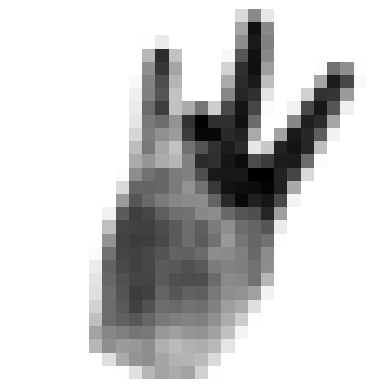

0

time: 202 ms (started: 2025-01-29 09:41:17 +00:00)


In [ ]:
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation function

In [ ]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

time: 399 µs (started: 2025-01-29 09:41:17 +00:00)


## Loss Function

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, I took care of clipping the values to prevent the logarithm to yield infinity or negative infinity.**


In [ ]:
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


time: 460 µs (started: 2025-01-29 09:41:17 +00:00)


## Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 64
learning_rate = 0.009
epochs = 100

time: 429 µs (started: 2025-01-29 09:41:18 +00:00)


## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print("W1.shape: ",W1.shape)
print("b1.shape: ",b1.shape)
print("W2.shape: ",W2.shape)
print("b2.shape: ",b2.shape)

W1.shape:  (64, 784)
b1.shape:  (64, 1)
W2.shape:  (1, 64)
b2.shape:  (1, 1)
time: 8.13 ms (started: 2025-01-29 09:41:18 +00:00)


## Training

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X_train.shape[1]

total_accuracy = 0

for i in range(epochs):
  avg_epoch_loss = 0
  correct_predictions = 0
  for j in range(num_of_examples):
    Z1 = np.matmul(W1, X[:,j]).reshape(-1,1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = A2.item()

    loss = log_loss(Yout, Y[j])
    avg_epoch_loss = avg_epoch_loss + loss

    prediction = 1 if Yout > 0.5 else 0
    if prediction == Y[j]:
        correct_predictions += 1

    dZ2 = (A2 - Y[j]) * A2 * (1 - A2)
    dW2 = np.matmul(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = np.matmul(dZ1, X[:, j].reshape(1, -1))
    db1 =  np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1

  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss.item())
  epoch_list.append(i)
  accuracy = correct_predictions / num_of_examples * 100

  total_accuracy += accuracy

  print("Epoch", i," Loss:", avg_epoch_loss, ", Training Accuracy: ", accuracy,"%")

avg_accuracy = total_accuracy / epochs
print(f"avg Training Accuracy: {avg_accuracy:.2f}%")

Epoch 0  Loss: [0.84255894] , Training Accuracy:  59.62499999999999 %
Epoch 1  Loss: [0.71510952] , Training Accuracy:  62.875 %
Epoch 2  Loss: [0.64360655] , Training Accuracy:  67.0 %
Epoch 3  Loss: [0.58428509] , Training Accuracy:  71.25 %
Epoch 4  Loss: [0.53571147] , Training Accuracy:  74.375 %
Epoch 5  Loss: [0.49646211] , Training Accuracy:  78.25 %
Epoch 6  Loss: [0.46454268] , Training Accuracy:  79.75 %
Epoch 7  Loss: [0.4381865] , Training Accuracy:  81.75 %
Epoch 8  Loss: [0.41606531] , Training Accuracy:  83.625 %
Epoch 9  Loss: [0.39721992] , Training Accuracy:  85.5 %
Epoch 10  Loss: [0.38094962] , Training Accuracy:  87.125 %
Epoch 11  Loss: [0.3667255] , Training Accuracy:  87.5 %
Epoch 12  Loss: [0.35413976] , Training Accuracy:  88.25 %
Epoch 13  Loss: [0.34287752] , Training Accuracy:  89.0 %
Epoch 14  Loss: [0.33269667] , Training Accuracy:  89.375 %
Epoch 15  Loss: [0.32341104] , Training Accuracy:  89.5 %
Epoch 16  Loss: [0.31487662] , Training Accuracy:  89.5 

### Loss Visualization

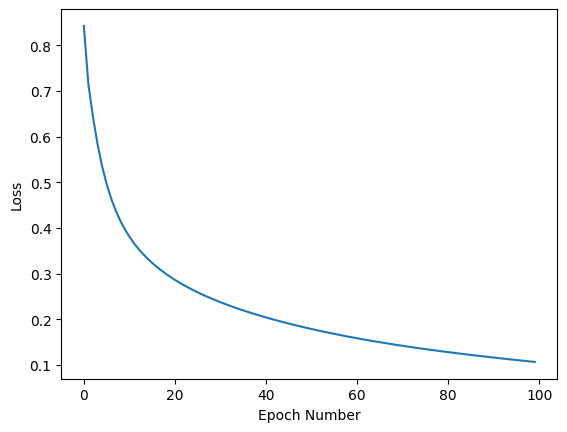

time: 181 ms (started: 2025-01-29 09:42:32 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test performance

In [ ]:
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

print(confusion_matrix(labels.T,predictions.T))

#[[TN  FP]
#[FN  TP]]

print("Accuracy: ",accuracy_score(labels.T, predictions.T)*100,"%")

[[91  9]
 [ 9 91]]
Accuracy:  91.0 %
time: 8.48 ms (started: 2025-01-29 09:42:32 +00:00)


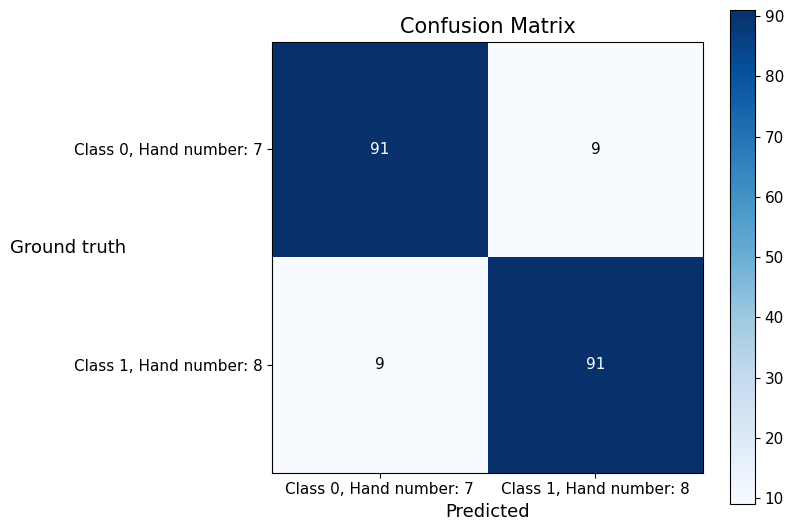

time: 255 ms (started: 2025-01-29 09:42:32 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predictions.T, labels.T)
plt.rc('font', size='11')
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix',size=15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0, Hand number: ' + classes[0], 'Class 1, Hand number: ' + classes[1]])
plt.yticks(tick_marks, ['Class 0, Hand number: ' + classes[0], 'Class 1, Hand number: ' + classes[1]])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.ylabel('Ground truth', rotation=0,size=13)
plt.xlabel('Predicted',size=13)

plt.tight_layout()
plt.show()

### Visualize the results

Plotting 10 examples - predictions and labels

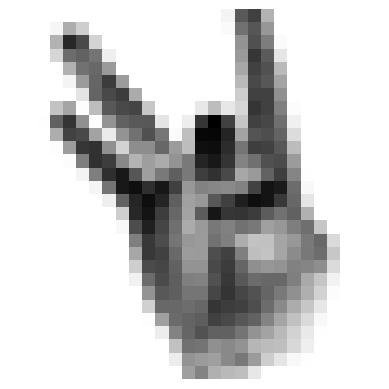

Real= 1 Predicted= [0.67726119]


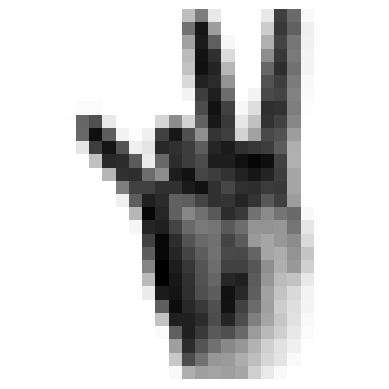

Real= 0 Predicted= [0.02129763]


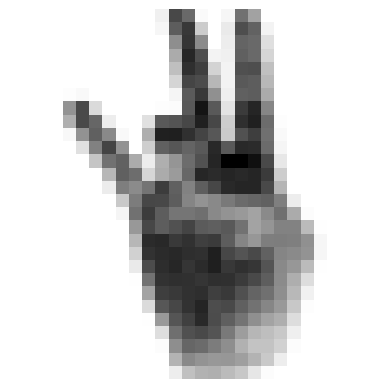

Real= 0 Predicted= [0.02071863]


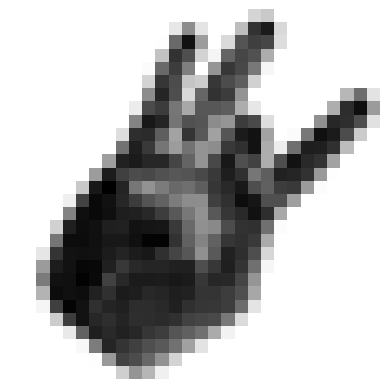

Real= 1 Predicted= [0.94552306]


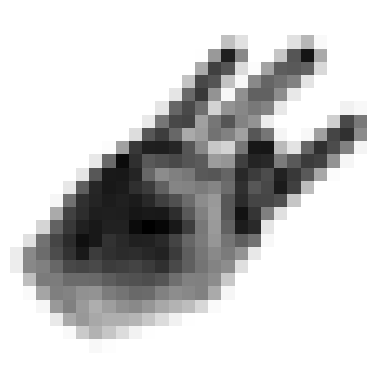

Real= 1 Predicted= [0.99488886]


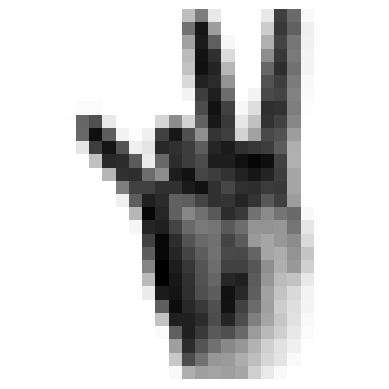

Real= 0 Predicted= [0.02129763]


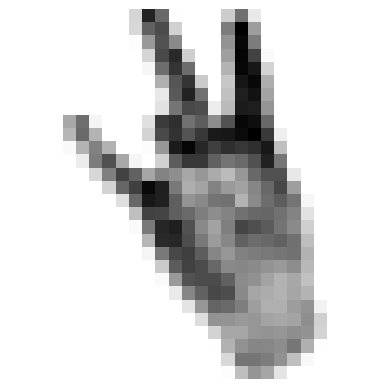

Real= 0 Predicted= [0.06471515]


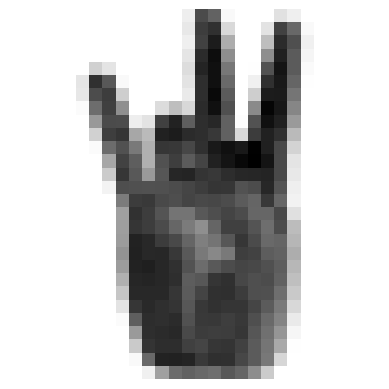

Real= 0 Predicted= [0.10187124]


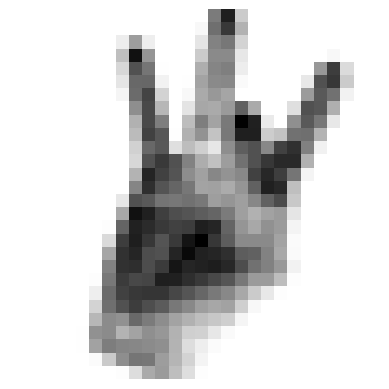

Real= 1 Predicted= [0.93831364]


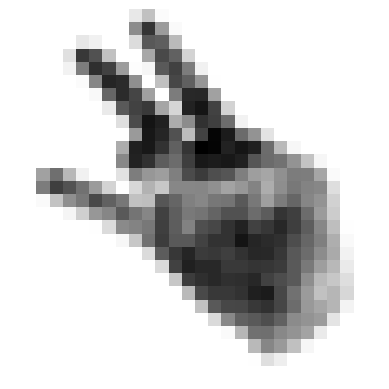

Real= 0 Predicted= [0.09221439]
time: 528 ms (started: 2025-01-29 09:42:32 +00:00)


In [ ]:
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1)
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2)

In [ ]:
end=time.time()
print(f"Total runtime in seconds: {end-start}")

Total runtime in seconds: 103.38780474662781
time: 4.21 ms (started: 2025-01-29 09:42:33 +00:00)
